In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [120]:
Fs = 800 #Частота дискретизації Fs, Гц
bits = 9 #Розрядність представлення відліків сигналу, біт
amplitude = 0.5 #параметри випадкового сигналу
dispersion = 0.5 #параметри випадкового сигналу
f = Fs / 8

In [3]:
#function that returns X and Y for a analogue signal
def signal(num_periods, F, Fs):
    T = 1/F
    t = np.linspace(0, num_periods*T, num_periods*Fs)
    y = np.cos(2*np.pi*F*t)
    return t, y

In [4]:
#function that returns X and Y for a discrete signal
def discreteSignal(num_periods, F, Fs):
    T = 1/F
    Ts = 1/Fs
    A = 1
    t = np.arange(0*T,num_periods*T,Ts)
    y = A * np.cos(2 * np.pi * F * t)
    return t, y

### 1.	Побудувати графік аналогового сигналу на інтервалі 2-3 періоди сигналу, використовуючи функцію plot.

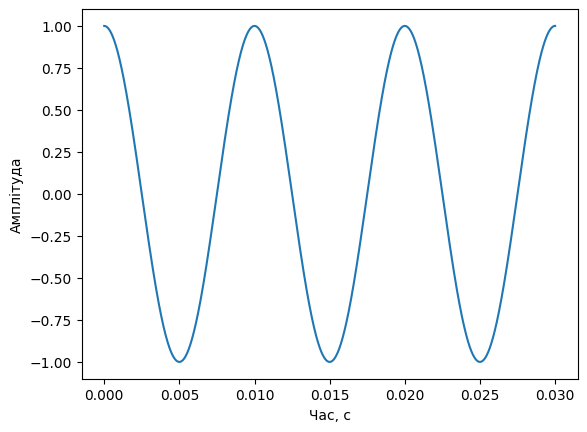

In [5]:
t, y = signal(3, f, Fs)
plt.plot(t, y)
plt.xlabel('Час, с')
plt.ylabel('Амплітуда')
plt.show()

### 2.Використовуючи функцію stem, побудувати графік дискретизованого сигналу в тих же координатах.

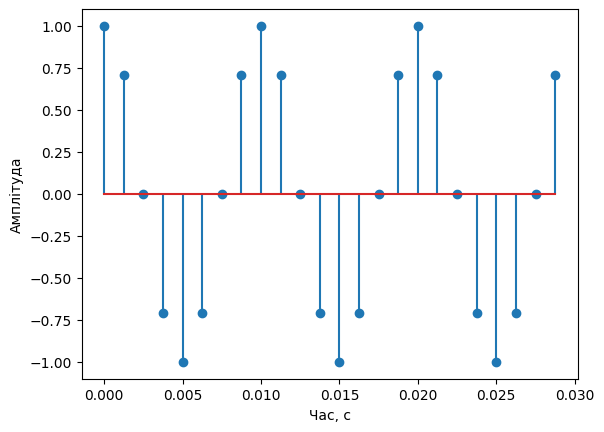

In [6]:
t, y = discreteSignal(3, f, Fs)
plt.stem(t, y)
plt.xlabel('Час, с')
plt.ylabel('Амплітуда')
plt.show()

### 3.	 Побудувати графік відновленого аналогового сигналу по дискретним відлікам за допомогою ряду Котельникова.

In [7]:
def sinc_interp(x, y, new_x, a=2):
    """
    Interpolate the curve defined by x and y at the new points new_x using
    the sinc interpolation formula with a parameter a.

    Parameters:
    -----------
    x : array-like
        The x-coordinates of the original curve.
    y : array-like
        The y-coordinates of the original curve.
    new_x : array-like
        The x-coordinates of the points at which to interpolate the curve.
    a : float
        The parameter a in the sinc interpolation formula.
    
    Returns:
    --------
    new_y : array-like
        The y-coordinates of the interpolated curve at the points new_x.
    """
    new_y = []
    for xn in new_x:
        y_sum = 0
        for i in range(len(x)):
            if x[i] == xn:
                y_sum = y[i]
                break
            y_sum += y[i] * np.sinc(a * (xn - x[i]))
        new_y.append(y_sum)
    return np.array(new_y)


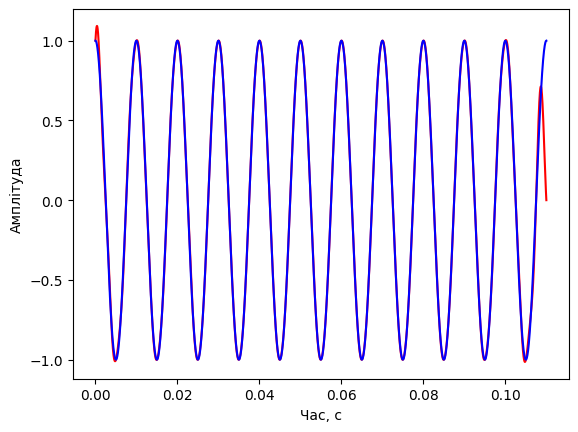

In [8]:
newX, Y = signal(11, f, Fs)
t, y = discreteSignal(11, f, Fs)
newY = sinc_interp(t, y, newX, a=Fs)
plt.plot(newX, newY, 'r')
plt.plot(newX, Y, 'b')
plt.xlabel('Час, с')
plt.ylabel('Амплітуда')
plt.show()

### 4.	 Визначити частоту відновленого сигналу.

In [9]:
#позбавляємося крайових ефектів
newX = newX[Fs*3:-Fs*3] 
newY = newY[Fs*3:-Fs*3]

In [10]:
# Fast Fourier Transform
yf = fft(newY)
xf = fftfreq(len(newY), 1/Fs)
ind = np.argmax(np.abs(yf))
print(f'Frequency restored: {abs(xf[ind]) * f}')
print(f'Frequency discrete: {f}')

Frequency restored: 100.0
Frequency discrete: 100.0


### 5.	 Побудувати графік залежності частоти відновленого сигналу від частоти початкового сигналу. Пояснити його форму.

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 
[100.0, 200.0, 300.0, 400.0, 318.1818181818182, 218.1818181818182, 127.27272727272728, 0.0, 81.81818181818183, 181.8181818181818, 300.0, 327.27272727272725, 354.5454545454545, 254.54545454545456, 136.36363636363637, 0.0, 154.54545454545456, 163.63636363636365, 345.45454545454544, 363.6363636363636, 381.8181818181818, 200.0, 209.0909090909091, 0.0, 227.27272727272728, 236.36363636363637, 245.45454545454547, 254.54545454545456, 263.6363636363636, 272.72727272727275, 0.0, 0.0]
[ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100. 1200.
 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400.
 2500. 2600. 2700. 2800. 2900. 3000. 3100. 3200.]


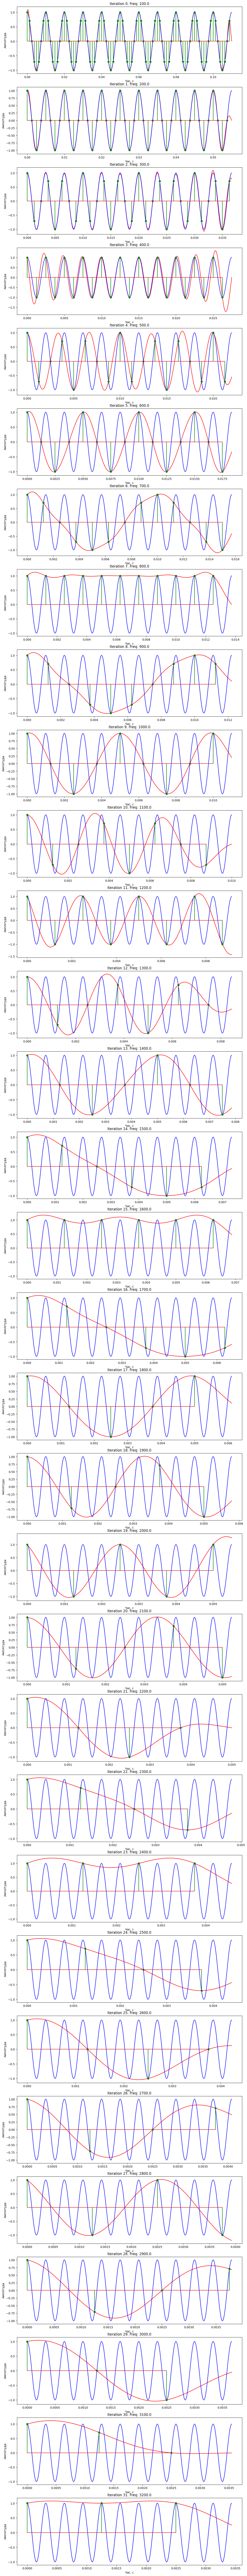

In [11]:
figs_count = 32
freqs = np.linspace(Fs/8, 4*Fs, figs_count)
figs,axs = plt.subplots(figs_count,1,figsize=(14,160))

freqscalculated = []

for i, freq in enumerate(freqs):
    print(i, end = ' ')
    ax = axs[i]
    ax.set_title(f'Iteration {i}. Freq: {freq}')
    newX, Y = signal(11, freq, Fs)
    t, y = discreteSignal(11, freq, Fs)
    newY = sinc_interp(t, y, newX, a=Fs)
    ax.plot(newX, newY, 'r')
    ax.plot(newX, Y, 'b')
    ax.stem(t, y, 'g')
    ax.set_xlabel('Час, с')
    ax.set_ylabel('Амплітуда')
    # Fast Fourier Transform
    yf = fft(newY)
    xf = fftfreq(len(newY), 1/Fs)
    ind = np.argmax(np.abs(yf))
    freqscalculated.append(abs(xf[ind]) * freq)
print()
print(freqscalculated)
print(freqs)

Text(0.5, 0, 'original_freq')

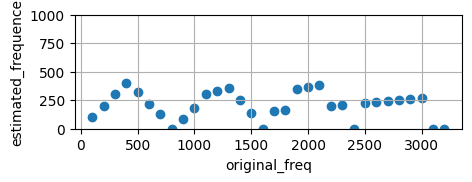

In [12]:
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(freqs,freqscalculated)
ax.grid()
#ax.gca().set_aspect("equal")
ax.set(ylim=(0, 1000))
ax.set_aspect('equal')
ax.set_ylabel('estimated_frequence')
ax.set_xlabel('original_freq')

### 6.	Згенерувати дискретний сигнал, отриманий шляхом дискретизації аналогового гармонічного сигналу с частотою 3Fs/5 і тривалістю, достатньою для обчислення статистичних параметрів і побудови гістограм.

Частота 3Fs/5: 480.0


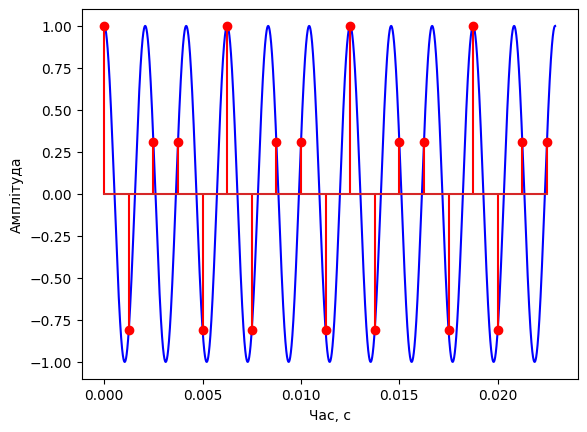

In [44]:
f6 = 3*Fs/5
print(f'Частота 3Fs/5: {f6}')
t, y = discreteSignal(11, f6, Fs)
X, Y = signal(11, f6, Fs)
plt.plot(X, Y, 'b')
plt.stem(t, y, 'r')
plt.xlabel('Час, с')
plt.ylabel('Амплітуда')
plt.show()

### 7.	Виконати квантування дискретного сигналу, використовуючи округлення з кроком, який відповідає представленню відліків двійковими числами, розрядність яких задана в таблиці.

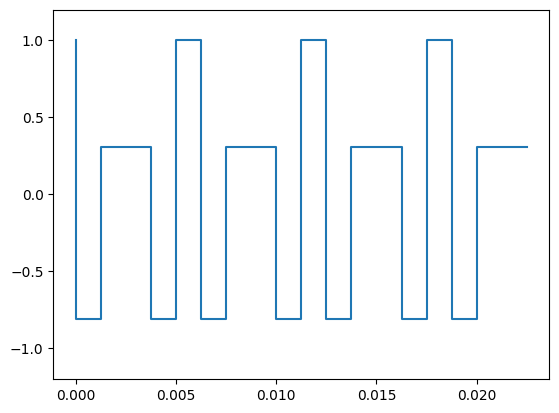

In [20]:
def quant(y):
    return np.round(2**bits*y)/2**bits

quant_np = np.vectorize(quant)
yQuant = quant_np(y)
plt.step(t, yQuant)
plt.ylim(-1.2, 1.2)
plt.show()

### 8.	Обчислити похибку квантування. Розрахувати дисперсію, мінімальне і максимальне значення похибки. Порівняти отримані значення зі значеннями, обчисленими по формулам. Побудувати гістограму похибки (функция hist) і графік залежності похибки від часу.

In [26]:
quantErrors = np.abs(yQuant - y)
meanError = np.mean(quantErrors)
stdError = np.std(quantErrors)
min_error = np.min(quantErrors)
max_error = np.max(quantErrors)

In [27]:
print(f'mean error: {meanError}\nstandard deviation: {stdError}\nmin error: {min_error}\nmax_error: {max_error}')

mean error: 0.0003341402960109237
standard deviation: 0.00017254930689961654
min error: 0.0
max_error: 0.0004232443749565551


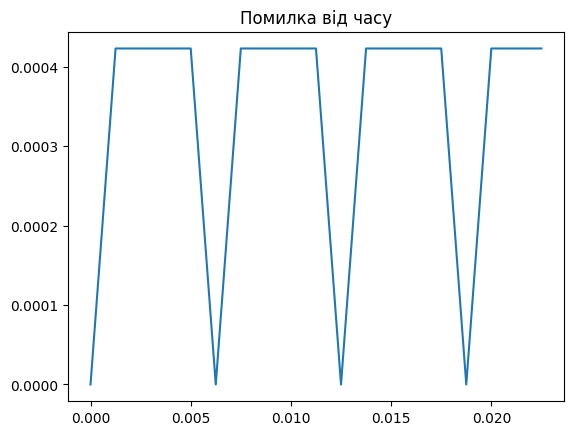

In [35]:
plt.plot(t, quantErrors)
plt.title('Помилка від часу')
plt.show()

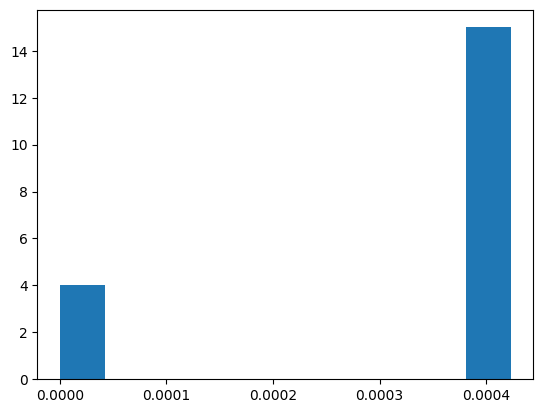

In [37]:
plt.hist(quantErrors)
plt.show()

### 9.	Повтории п.п. 6-8 для сигналу з частотою Fs/sqrt(8). Порівняти розподіл похибки квантування з результатом п.3. Пояснити відмінності.

Пункт 6

Частота Fs/sqrt(8): 480.0


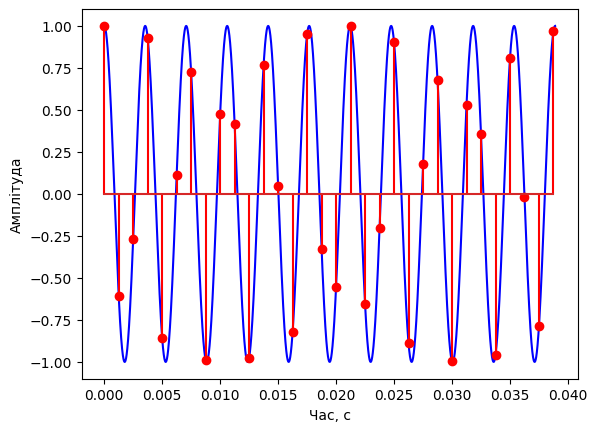

In [52]:
f9 = Fs/np.sqrt(8)
print(f'Частота Fs/sqrt(8): {f6}')
t, y = discreteSignal(11, f9, Fs)
X, Y = signal(11, f9, Fs)
plt.plot(X, Y, 'b')
plt.stem(t, y, 'r')
plt.xlabel('Час, с')
plt.ylabel('Амплітуда')
plt.show()

Пункт 7

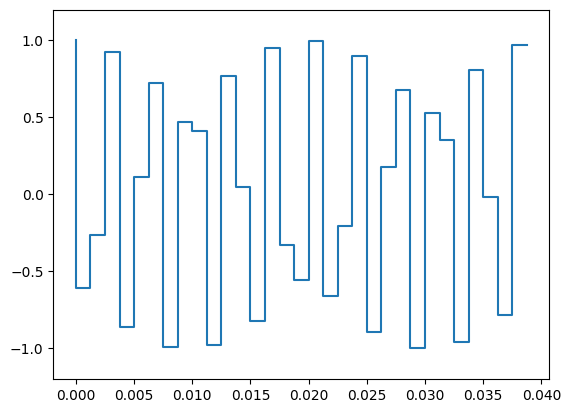

In [53]:
yQuant = quant_np(y)
plt.step(t, yQuant)
plt.ylim(-1.2, 1.2)
plt.show()

Пункт 8

In [55]:
quantErrors = np.abs(yQuant - y)
meanError = np.mean(quantErrors)
stdError = np.std(quantErrors)
min_error = np.min(quantErrors)
max_error = np.max(quantErrors)

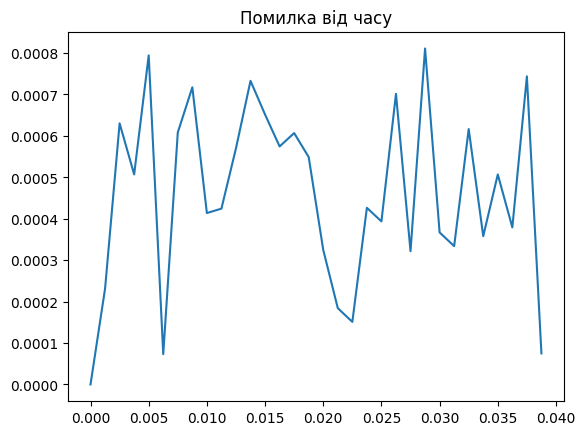

In [56]:
plt.plot(t, quantErrors)
plt.title('Помилка від часу')
plt.show()

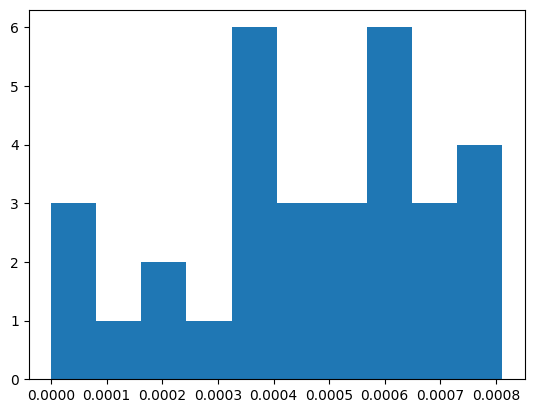

In [57]:
plt.hist(quantErrors)
plt.show()

### 10.	Повторити п.п. 6-8 для нормального псевдовипадкового (середнєA, дисперсія D наведені в таблиці) сигналу, сформованого функцією normrnd. Порівняти розподіл похибки квантування з в пп.8, 9.

In [162]:
#function that returns X and Y for a discrete signal (Normal distrib)
def discreteSignalNormal(num_periods, F, Fs, A, D):
    T = 1/F
    Ts = 1/Fs
    t = np.arange(0*T,num_periods*T,Ts)
    y = np.random.normal(A, D, len(t))
    return t, y

Пункт 6

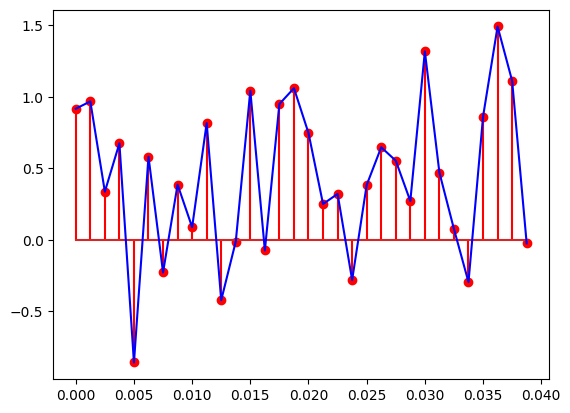

In [173]:
f10 = Fs/np.sqrt(8)
t, y = discreteSignalNormal(11, f10, Fs, amplitude, dispersion)
plt.stem(t, y, 'r')
plt.plot(t, y, 'blue')
plt.show()

Пункт 7

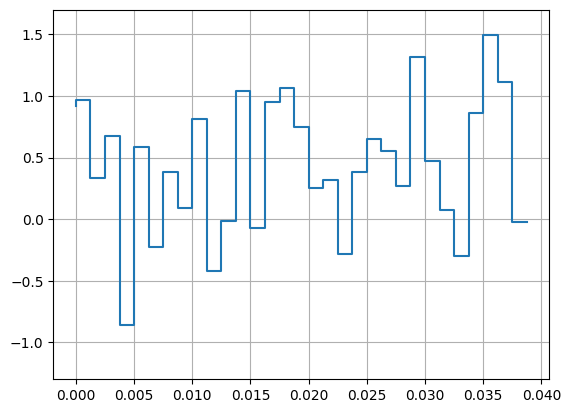

In [179]:
yQuant = quant_np(y)
plt.step(t, yQuant)
plt.ylim(-1.3, 1.7)
plt.grid()
plt.show()

Пункт 8

In [180]:
quantErrors = np.abs(yQuant - y)
meanError = np.mean(quantErrors)
stdError = np.std(quantErrors)
min_error = np.min(quantErrors)
max_error = np.max(quantErrors)

In [181]:
print(f'mean error: {meanError}\nstandard deviation: {stdError}\nmin error: {min_error}\nmax_error: {max_error}')

mean error: 0.0004807583657255969
standard deviation: 0.0002788989265930158
min error: 1.0493245798159911e-05
max_error: 0.0009453267040770985


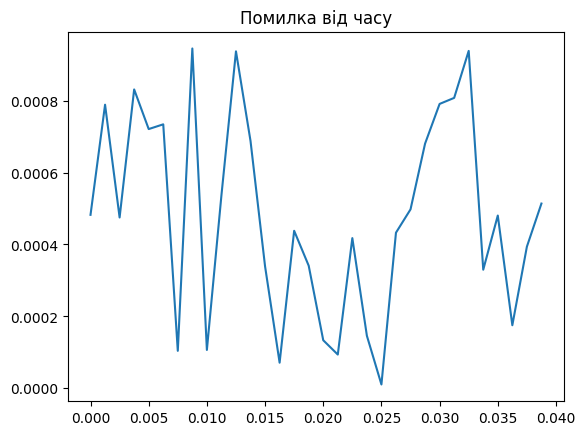

In [182]:
plt.plot(t, quantErrors)
plt.title('Помилка від часу')
plt.show()

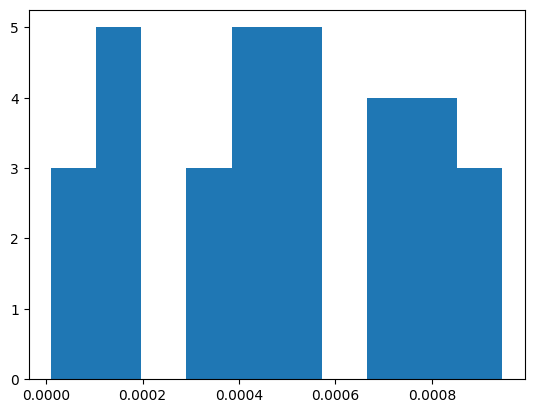

In [183]:
plt.hist(quantErrors)
plt.show()